## Automatic extraction and classification of observational sentences in "Astronomia nova" 
 Gerd Graßhoff$^{(1,2)}$, Mohammad Yeghaneh$^{(2)}$

1: Max-Planck-Institute for the History of Science, Berlin

2: Humboldt University, Berlin

Date: November 2019

Kepler's "New Astronomy (Astronomia Nova)" was completed and published in Linz in 1609. Buried deep in this, at times very mystical book, is Kepler's first formulation of his first and second laws of planetary motion, which in modern parlance can be stated as follows:
*  Planetary orbits are ellipses, with the Sun located at one focus;
*  Planets move along their elliptical orbit with a speed such that a line segment joining the planet to the Sun sweeps equal surface areas in equal time intervals.

At the same time he reconceptualized "oppositions" as based upon the observed, rather than "average," position of the Sun, Kepler analyzed Brahe's individual **observations** of Mars for potential errors of various other kinds. with this introduction observations, sentiments play an important role in tracking the knowledge. This motivates us to:  

- extract the explicit observational sentences using the book custom NER model
- provide two models to classify the explicit observational sentences of the book using machine learning #ref

In [32]:
import pandas as pd
import numpy as np
%load_ext autoreload
%autoreload 2
import utility_01
from utility_01 import *
from sklearn.metrics import roc_curve ,roc_auc_score ,precision_recall_curve,auc,confusion_matrix,classification_report
from warnings import filterwarnings
filterwarnings('ignore')
import matplotlib.pyplot as plt
import random 



The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [33]:
options = {"compact": True, "bg": "#09a3d5",
           "color": "white", "font": "Source Sans Pro","collapse_phrases":False}

In [34]:
pd.set_option('display.max_colwidth', -1)
pd.set_option('max_colwidth', 1000)


## Resources

### Import resources

In [35]:
df=pd.read_json('../data/dfObsV04A02.json');
df=df.sort_index();


Sample of the first sentences of the book in the dataframe format 

In [36]:
df.head()

,Sentence,Chapter,Paragraph,ParaIndex,ASO,Entities,FNER,Label
0,Chapter 1,1,Chapter 1,0,{'act': 'Chapter'},[],"[0, 0, 0]",0
1,"On the distinction between the first motion and the second or proper motions; and in the proper motions, between the first and the second inequality.",1,"On the distinction between the first motion and the second or proper motions; and in the proper motions, between the first and the second inequality.",1,{'act': 'On'},[],"[0, 0, 0]",0
2,The testimony of the ages confirms that the motions of the planets are orbicular.,1,"The testimony of the ages confirms that the motions of the planets are orbicular. Reason, having borrowed from experience, immediately presumes this: that their gyrations are perfect circles. For among figures it is circles, and among bodies the heavens, that are considered the most perfect. However, when experience seems to teach something different to those who pay careful attention, namely, that the planets deviate from a simple circular path, it gives rise to a powerful sense of wonder, which at length drives people to look into causes.",2,"{'act': 'confirms', 'subject': 'testimony'}",[],"[0, 0, 0]",0
3,"Reason, having borrowed from experience, immediately presumes this: that their gyrations are perfect circles.",1,"The testimony of the ages confirms that the motions of the planets are orbicular. Reason, having borrowed from experience, immediately presumes this: that their gyrations are perfect circles. For among figures it is circles, and among bodies the heavens, that are considered the most perfect. However, when experience seems to teach something different to those who pay careful attention, namely, that the planets deviate from a simple circular path, it gives rise to a powerful sense of wonder, which at length drives people to look into causes.",2,"{'act': 'presumes', 'subject': 'reason', 'obj': 'this: that their gyrations are perfect circles'}",[],"[0, 0, 0]",0
4,"For among figures it is circles, and among bodies the heavens, that are considered the most perfect.",1,"The testimony of the ages confirms that the motions of the planets are orbicular. Reason, having borrowed from experience, immediately presumes this: that their gyrations are perfect circles. For among figures it is circles, and among bodies the heavens, that are considered the most perfect. However, when experience seems to teach something different to those who pay careful attention, namely, that the planets deviate from a simple circular path, it gives rise to a powerful sense of wonder, which at length drives people to look into causes.",2,{'act': 'considered'},[],"[0, 0, 0]",0


 Sample of the last sentences of the book in the dataframe format 

In [37]:
df.tail()

,Sentence,Chapter,Paragraph,ParaIndex,ASO,Entities,FNER,Label
6694,"To find the position of Mars at opposition, Kepler computed the angular distance that Mars and Earth—now substituting the place of the Sun—moved during 17 hours 20 minutes; Mars moved eastward about 16' 20"" and the Sun westward about 42' 18"".",appendix b,"As shown in Figure 2B, the Sun is assumed to be at the center of the planetary system. The longitudes of Mars and Earth's in reference to the center of the Sun are 198° 21' 30"" and 199° 20' 8"" respectively. The deviation of elongation between Mars and the Earth remain 58' 38"". To find the position of Mars at opposition, Kepler computed the angular distance that Mars and Earth—now substituting the place of the Sun—moved during 17 hours 20 minutes; Mars moved eastward about 16' 20"" and the Sun westward about 42' 18"". Accordingly, Kepler determined the longitude of Mars at opposition to be 198° 37' 50"" from which he subtracted about 39"" in order to correct Mars's orbit; he got 198° 37' 10"" (18° 37' 10"" Libra).",1603,"{'act': 'moved', 'subject': 'mars'}","[[Mars, PLAN], [opposition, ASTR], [Mars, PLAN], [Earth, PLAN], [Sun, PLAN], [17 hours 20 minutes, TIME], [Mars, PLAN], [eastward, ASTR], [16' 20"", LONG], [Sun, PLAN], [42' 18"", LONG]]","[0, 1, 1]",0
6695,"Accordingly, Kepler determined the longitude of Mars at opposition to be 198° 37' 50"" from which he subtracted about 39"" in order to correct Mars's orbit; he got 198° 37' 10"" (18° 37' 10"" Libra).",appendix b,"As shown in Figure 2B, the Sun is assumed to be at the center of the planetary system. The longitudes of Mars and Earth's in reference to the center of the Sun are 198° 21' 30"" and 199° 20' 8"" respectively. The deviation of elongation between Mars and the Earth remain 58' 38"". To find the position of Mars at opposition, Kepler computed the angular distance that Mars and Earth—now substituting the place of the Sun—moved during 17 hours 20 minutes; Mars moved eastward about 16' 20"" and the Sun westward about 42' 18"". Accordingly, Kepler determined the longitude of Mars at opposition to be 198° 37' 50"" from which he subtracted about 39"" in order to correct Mars's orbit; he got 198° 37' 10"" (18° 37' 10"" Libra).",1603,"{'act': 'got', 'subject': 'he', 'obj': '' 10'}","[[longitude, ASTR], [Mars, PLAN], [opposition, ASTR], [198° 37' 50"", LONG], [Mars, PLAN], [orbit, ASTR], [198° 37' 10"", LONG], [18° 37' 10"" Libra, LONG]]","[0, 0, 1]",0
6696,The Sun moved westward and its longitude decreased from the time of observation to its position opposite to Mars.,appendix b,"The Sun moved westward and its longitude decreased from the time of observation to its position opposite to Mars. Therefore, the time of opposition is 17 hours 20 minutes before March 29, at 21:43, the time when the observation was made. Kepler determined the time of opposition on March 28, 4h 23m AM, old style.",1604,"{'act': 'moved', 'subject': 'sun'}","[[Sun, PLAN], [longitude, ASTR], [observation, ASTR], [Mars, PLAN]]","[0, 0, 0]",0
6697,"Therefore, the time of opposition is 17 hours 20 minutes before March 29, at 21:43, the time when the observation was made.",appendix b,"The Sun moved westward and its longitude decreased from the time of observation to its position opposite to Mars. Therefore, the time of opposition is 17 hours 20 minutes before March 29, at 21:43, the time when the observation was made. Kepler determined the time of opposition on March 28, 4h 23m AM, old style.",1604,"{'act': 'is', 'subject': 'time'}","[[opposition, ASTR], [17 hours 20, TIME], [March 29, DATE], [observation, ASTR]]","[1, 1, 0]",0
6698,"Kepler determined the time of opposition on March 28, 4h 23m AM, old style.",appendix b,"The Sun moved westward and its longitude decreased from the time of observation to its position opposite to Mars. Therefore, the time of opposition is 17 hours 20 minutes before March 29, at 21:43, the time when the observation was made. Kepler determined the time o

In [38]:
df.iloc[980:990]

,Sentence,Chapter,Paragraph,ParaIndex,ASO,Entities,FNER,Label
980,"On an inserted sheet here, an attempt was made to correct for a refraction of two minutes.",10,"On 1582 December 28 at 11h 30m, they set Mars down at 16° 47’ Cancer by observation ^6. The moment of opposition assigned by Tycho comes 46 minutes later, during which the planet retrogressed less than one minute. Tycho therefore puts it at 16° 46’ 16” Cancer ^7. On an inserted sheet here, an attempt was made to correct for a refraction of two minutes. This was, I think, first trial of the theory of refraction then being developed. Nevertheless, he followed the observed value unchanged, thus declining to consider the planet as something which could alter its position. Nor was there any need for correction, since it was in Cancer, beyond the reach of refraction, and was in mid-sky where, in Cancer, there is no longitudinal parallax.",221,{'act': 'made'},"[[refraction, ASTR]]","[0, 0, 0]",0
981,"This was, I think, first trial of the theory of refraction then being developed.",10,"On 1582 December 28 at 11h 30m, they set Mars down at 16° 47’ Cancer by observation ^6. The moment of opposition assigned by Tycho comes 46 minutes later, during which the planet retrogressed less than one minute. Tycho therefore puts it at 16° 46’ 16” Cancer ^7. On an inserted sheet here, an attempt was made to correct for a refraction of two minutes. This was, I think, first trial of the theory of refraction then being developed. Nevertheless, he followed the observed value unchanged, thus declining to consider the planet as something which could alter its position. Nor was there any need for correction, since it was in Cancer, beyond the reach of refraction, and was in mid-sky where, in Cancer, there is no longitudinal parallax.",221,"{'act': 'was', 'subject': 'this'}","[[refraction, ASTR]]","[0, 0, 0]",0
982,"Nevertheless, he followed the observed value unchanged, thus declining to consider the planet as something which could alter its position.",10,"On 1582 December 28 at 11h 30m, they set Mars down at 16° 47’ Cancer by observation ^6. The moment of opposition assigned by Tycho comes 46 minutes later, during which the planet retrogressed less than one minute. Tycho therefore puts it at 16° 46’ 16” Cancer ^7. On an inserted sheet here, an attempt was made to correct for a refraction of two minutes. This was, I think, first trial of the theory of refraction then being developed. Nevertheless, he followed the observed value unchanged, thus declining to consider the planet as something which could alter its position. Nor was there any need for correction, since it was in Cancer, beyond the reach of refraction, and was in mid-sky where, in Cancer, there is no longitudinal parallax.",221,"{'act': 'followed', 'subject': 'he', 'obj': 'the observed value unchanged'}","[[observed, ASTR]]","[0, 0, 0]",0
983,"Nor was there any need for correction, since it was in Cancer, beyond the reach of refraction, and was in mid-sky where, in Cancer, there is no longitudinal parallax.",10,"On 1582 December 28 at 11h 30m, they set Mars down at 16° 47’ Cancer by observation ^6. The moment of opposition assigned by Tycho comes 46 minutes later, during which the planet retrogressed less than one minute. Tycho therefore puts it at 16° 46’ 16” Cancer ^7. On an inserted sheet here, an attempt was made to correct for a refraction of two minutes. This was, I think, first trial of the theory of refraction then being developed. Nevertheless, he followed the observed value unchanged, thus declining to consider the planet as something which could alter its position. Nor was there any need for correction, since it was in Cancer, beyond the reach of refraction, and was in mid-sky where, in Cancer, there is no longitudinal parallax.",221,"{'act': 'was', 'subject': 'it'}","[[refraction, ASTR], [longitudinal, ASTR], [parallax, ASTR]]","[0, 0, 0]",0
984,"On 1585 January 31 at 12h 0m, Mars was placed at 21° 18’ 11” Leo ^8.",10,"On 

# Distribution of explicit observational sentences 

here we extract the explicit observational sentences using custom Name Entity Recognition that we provided using deep learning. We can see the sentences in the corresponding paragraph. As you see we integrated data with such contributes as follows:

- **Sentence**  
- **Chapter**
- **Paragraph**
- **ParaIndex**
- **ASO**
- **Entities**
- **FNER**
- **Label**

In [39]:
df_obs=df[df.Label==1]

In [40]:
dfChobs=set(df_obs["Chapter"])
dfChobs

{10.0,
 11.0,
 12.0,
 13.0,
 15.0,
 22.0,
 24.0,
 26.0,
 42.0,
 51.0,
 61.0,
 62.0,
 65.0,
 69.0}

In [41]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6699 entries, 0 to 6698
Data columns (total 8 columns):
Sentence     6699 non-null object
Chapter      6699 non-null object
Paragraph    6699 non-null object
ParaIndex    6699 non-null int64
ASO          6699 non-null object
Entities     6699 non-null object
FNER         6699 non-null object
Label        6699 non-null int64
dtypes: int64(2), object(6)
memory usage: 471.0+ KB


In [73]:
df_obs=df[(df["Chapter"]=='11')|(df["Chapter"]=='12') | (df["Chapter"]=='13')|(df["Chapter"]=='14')]

In [74]:
df_obs

,Sentence,Chapter,Paragraph,ParaIndex,ASO,Entities,FNER,Label


In [63]:
df_obs

,Sentence,Chapter,Paragraph,ParaIndex,ASO,Entities,FNER,Label


# Data preparation for visualization

In [67]:
a=[]
for i in  dfChobs:
    Obch=df_obs[df_obs.Chapter == i].shape[0]
    a.append(Obch)

## Distribution of explicit observational Sentences

In [68]:
X=list(df_obs["Sentence"])
y=np.array(list(df_obs["Label"]))

In [69]:
from collections import Counter
category=Counter(y)
count=dict(category)

In [70]:
count

{}

ValueError: operands could not be broadcast together with remapped shapes [original->remapped]: (2,) and requested shape (0,)

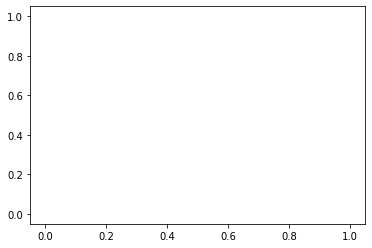

In [71]:
plt.bar(list(count.keys()),count.values(),color="r",width=.4,tick_label=["1","0"])
plt.title("Distribution of samples over different classes")


In [ ]:
from sklearn.feature_extraction.text import CountVectorizer,HashingVectorizer
from sklearn.feature_extraction.text import TfidfTransformer,TfidfVectorizer
from sklearn.feature_selection import SelectKBest,chi2
from sklearn.linear_model import SGDClassifier, LogisticRegression,LogisticRegressionCV
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import Pipeline
from sklearn.decomposition import TruncatedSVD
from sklearn.svm import SVC,LinearSVC
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split
from sklearn.neighbors import NearestNeighbors
#from xgboost import XGBClassifier

## Models

In [ ]:
vec=TfidfVectorizer()
clf= SGDClassifier()
trial_05=Pipeline([("vect",vec),("clf",clf)])
#####################################################
## 02-XGBClassifier

#trial_02 = Pipeline([('vect', CountVectorizer(stop_words='english')),
                     #('clf', XGBClassifier())])


In [ ]:
trial_05

# Explicit observational sentences using custom NER in the paragraph

In [ ]:
X_Obs=df.loc[df.Label==1]
X_Obs=X_Obs[["Sentence","Paragraph"]]


In [ ]:
X_Obs.head(10)


In [ ]:
Y_Obs=df.loc[df.Label==1]
Y_Obs=Y_Obs.Label
Y_Obs=list(Y_Obs)

# Non-observational sentences  in the pragraph

In [ ]:
X_NObs=df.loc[df.Label==0]
X_NObs=X_NObs[["Sentence","Paragraph"]]

In [ ]:
X_NObs.head(10)

In [ ]:
Y_NObs=df.loc[df.Label==0]
Y_NObs=Y_NObs.Label
Y_NObs=list(Y_NObs)

In [ ]:
x_obs = X_Obs.loc[0:, 'Sentence'].values
x_nobs = X_NObs.loc[0:73, 'Sentence'].values


In [ ]:
number_of_samples = len(Y_Obs)
Y_NObs=random.sample(Y_NObs,number_of_samples);
len(Y_NObs)

In [ ]:
y=Y_NObs+Y_Obs

In [ ]:
X1=x_nobs.tolist()

In [ ]:
X2=x_obs.tolist()

In [ ]:
X=X1+X2

# Distribution of Samples  after downsampling

In [ ]:
category=Counter(y)
count=dict(category)

In [ ]:
plt.bar(list(count.keys()),count.values(),color="r",width=.4,tick_label=["1","0"])
plt.title("Distribution of samples over different classes")

In [ ]:
X,y = shuffle(X, y, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(
X,y, test_size=0.10, random_state=42)  

# 1- Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier
RF=RandomForestClassifier()
trial_06=Pipeline([("vect",vec),("clf",RF)])
trial_06.fit(X_train,y_train)

In [ ]:
cross_validation_accuracy(trial_06,X,y,cv=10)

In [ ]:
y_pred = cross_val_predict(trial_06, X, y, cv=10)

cr=classification_report(y,y_pred)
print(cr)
cm = confusion_matrix(y_pred,y)

In [ ]:
print(cm)

In [ ]:
Colorful_Confusion_Matrix(y=y,y_test=y,y_pred=y_pred)

In [ ]:
precision, recall, thresholds = precision_recall_curve(y,y_pred)  
auc_score = auc(recall, precision)


In [ ]:
plot_pr(recall, precision)

## 1-SGD

In [ ]:
trial_05.fit(X_train,y_train)

In [ ]:
y_pred=trial_05.predict(X_test)

In [ ]:
cm=confusion_matrix(y_test,y_pred)
print(cm)
cr=classification_report(y_test,y_pred)
print(cr)
#Colorful_Confusion_Matrix(y, y_test, y_pred)


In [ ]:
cross_validation_accuracy(trial_05,X,y,cv=10)

In [ ]:
y_pred = cross_val_predict(trial_05, X, y, cv=10)

cr=classification_report(y,y_pred)
print(cr)
cm = confusion_matrix(y_pred,y)
print(cm)

In [ ]:
Colorful_Confusion_Matrix(y=y,y_test=y,y_pred=y_pred)

In [ ]:
precision, recall, thresholds = precision_recall_curve(y,y_pred)  
auc_score = auc(recall, precision)


In [ ]:
plot_pr(recall, precision)

##  Save the down sampled model

import pickle
saved_model = pickle.dumps(trial_06)

Pkl_Filename = "Pickle_RF_RESAMPLED_Model_02.pkl"  

with open(Pkl_Filename, 'wb') as file:  
    pickle.dump(trial_06, file)